# **Linear Regression using Neural Networks :**
---
# Importing libraries , defining classes and useful methods :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_train.csv",index_col = 0)

def sigmoid(z):                                                     # Sigmoid Activation function
    return 1/(1+np.exp(-z))

def sigmoid_derivative (x):                                         # Deriviative of sigmoid function
    return sigmoid(x)*(1-sigmoid(x))

def R2(out,y):                                                      # R2 score for checking accuracy of predictions over labelled test data
    return 1 - (np.sum((out-y)**2))/(np.sum((y - np.mean(y))**2))

class Layer():                                                      # Layer class for defining each layer of the neural network
    def __init__(self,n_inputs,n_neurons):                          # Attributes : weights , bias , outputs and error
        self.weights = np.random.randn(n_inputs,n_neurons)
        self.bias = np.random.randn(1,n_neurons)

    def forward(self,inputs):                                       # for calculating output
        self.outputs = inputs @ self.weights + self.bias
        
    def backward(self,error,weights):                               # for setting error from subsequent layer
        self.error = ( error @ np.transpose(weights) ) * sigmoid_derivative(self.outputs)

    def set_error(self,error):                                      # for setting error 
        self.error = error
 
def forward_propagate(x,layers,act):                        # Forward Propagation through the network to calculate outputs of each layer
                                                            # and to store activated outputs
    n = len(layers)-1
    for i in range(n):
        
        if i == 0 :                                         # Hidden layers
            layers[0].forward(x)                            # 
            act[0] = sigmoid(layers[0].outputs)             # sigmoid activation
        else:                                               #
            layers[i].forward(act[i-1])                     #
            act[i] = sigmoid(layers[i].outputs)             #

    layers[n].forward(act[n-1])                             # Output layer
    act[n] = (layers[n].outputs)                            # no activation

    return layers,act

def backward_propagate(x,y,learning_rate,layers,act):                   # Backward Propagation through the network to update weights and bias
    size = act[-1].shape[0]                                             # and set error for each layer
    n = len(layers) -1
    error = y-(act[-1])                                                 # error in final output

    for i in range(n,0,-1):
        if i == (n):
            layers[i].set_error(error)                                  # sets error for output layer
            Jw = np.array(act[i-1]).T @ layers[i].error                 # derivative of loss w.r.t weights of output layer
            Jb = np.sum(layers[i].error,axis = 0)                       # derivative of loss w.r.t bias of output layer

        else :
            layers[i].backward(layers[i+1].error,layers[i+1].weights)   # sets error of hidden layer
            Jw = np.array(act[i-1]).T @ layers[i].error                 # derivative of loss w.r.t weights of ith hidden layer
            Jb = np.sum(layers[i].error,axis = 0)                       # derivative of loss w.r.t bias of ith hidden layer

    # Updating weights and bias :

        layers[i].weights += learning_rate/size*Jw
        layers[i].bias += learning_rate/size*Jb

    layers[0].backward(layers[1].error,layers[1].weights)               # sets error of hidden layer
    Jw = np.array(x).T @ layers[0].error                                # derivative of loss w.r.t weights of first hidden layer
    Jb = np.sum(layers[0].error,axis = 0)                               # derivative of loss w.r.t bias of first hidden layer

 # Updating weights and bias of first hidden layer :

    layers[0].weights += learning_rate/size*Jw
    layers[0].bias += learning_rate/size*Jb

    return layers


# Initializing Variables and the Neural Network :

In [ ]:
# Splitting labelled data in training and testing sets :

train_data = df_train.iloc[:45000,:-1].values
test_data = df_train.iloc[45000:,:-1].values
label_train = df_train.iloc[:45000,-1].to_numpy()
label_test = df_train.iloc[45000:,-1].to_numpy()

# Standardizing Data w.r.t Training data :

x = (train_data - np.mean(train_data))/np.std(train_data)
x_test = (test_data - np.mean(train_data))/np.std(train_data)

# Standardizing Labels w.r.t Training Labels :

y = (label_train - np.mean(label_train))/np.std(label_train)
y_test = (label_test - np.mean(label_train))/np.std(label_train)

y = y.reshape([label_train.shape[0],1])              # to maintain shape
y_test = y_test.reshape([label_test.shape[0],1])

n = 2  #2                                       # number of hidden layers
m = 20  #20                                     # number of neurons in each hidden layer

layers , act = [1]*(n+1),[1]*(n+1)              # Creating lists to store layers and activated outputs

for i in range(n):
    if i == 0 :
        layers[0] = Layer(20,m)                 # first hidden layer 
        layers[0].forward(x)                    #
        act[0] = sigmoid(layers[0].outputs)     # sigmoid activation
    else:
        layers[i] = Layer(m,m)                  # hidden layers
        layers[i].forward(act[i-1])             #
        act[i] = sigmoid(layers[i].outputs)     # sigmoid activation

layers[n] = Layer(m,1)                          # Output layer
layers[n].forward(act[n-1])                     # 
act[n] = (layers[n].outputs)                    # no activation

# Using Stored weights and biases :
'''Comment out below statements to start with random weights and biases.'''

layers[0].weights = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlw1.npy")
layers[0].bias = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlb1.npy")
layers[1].weights = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlw2.npy")
layers[1].bias = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlb2.npy")
layers[2].weights = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlw3.npy")
layers[2].bias = np.load("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlb3.npy")

# Training of Neural Network via mini-batch gradient descent :

After 100 iterations : 
loss =  0.15907779748422324
84.3731694200653
After 200 iterations : 
loss =  0.15907774526808544
84.37318844833756
After 300 iterations : 
loss =  0.1590776953538612
84.37320687724738
After 400 iterations : 
loss =  0.15907764732061944
84.3732247992936
After 500 iterations : 
loss =  0.1590776008265862
84.373242289995
After 600 iterations : 
loss =  0.15907755559253034
84.37325941124232
After 700 iterations : 
loss =  0.15907751138917006
84.37327621390347
After 800 iterations : 
loss =  0.15907746802746336
84.37329273987899
After 900 iterations : 
loss =  0.1590774253510094
84.37330902374241
After 1000 iterations : 
loss =  0.15907738323002954
84.37332509406106


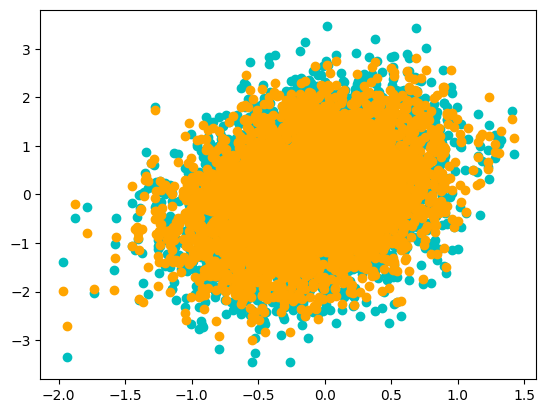

In [ ]:
learning_rate=0.01
n_iterations = 100

start = 0
end = x.shape[0]
step = x.shape[0]//10                       # mini-batch

itr = 0                                     # counter for no. of iterations

for i in range(n_iterations):
    for k in range(start,end,step):

        layers,act = forward_propagate( x[k:k+step,:] , layers , act )                    # updating outputs and activated outputs
        layers = backward_propagate( x[k:k+step,:] , y[k:k+step,0].reshape([step,1])
                                    , learning_rate , layers , act )                      # updating weights and biases
        layers,act = forward_propagate( x[k:k+step,:] , layers , act )                    # updating outputs and activated outputs

        loss = np.mean((act[-1] - y[k:k+step,0].reshape([step,1]))**2)                    # mean squared error loss
        itr+=1

        if (itr % 100 == 0):
            print("After {} iterations : ".format(itr))
            print("loss = ",loss)

        # Calculating R2 score over labelled test data :

            layers_test ,act_test = forward_propagate(x_test,layers,act) 
            score = R2(act_test[-1],y_test)
            print(score*100)

# Plotting predicted values against labelled test data

plt.scatter(x_test[:,0],y_test, c = 'c')
plt.scatter(x_test[:,0],act_test[-1], c = 'orange')
plt.show()

Storing weights and biases in .npy files :

In [ ]:
np.save("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlw1.npy",layers[0].weights,allow_pickle = True)
np.save("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlb1.npy",layers[0].bias)
np.save("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlw2.npy",layers[1].weights)
np.save("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlb2.npy",layers[1].bias)
np.save("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlw3.npy",layers[2].weights)
np.save("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnlb3.npy",layers[2].bias)

# Predicting labels of Unlabelled test data :

In [ ]:
# Unlabelled Data :

df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/linear_test_data.csv")
X_test = df_test.iloc[:,1:].values
ids = df_test.iloc[:,0].values

# Standardizing Test data w.r.t Training data :

Test_data = (X_test - np.mean(train_data))/np.std(train_data)

layers_test,act_test = forward_propagate(Test_data,layers,act)
Y_pred = layers_test[-1].outputs                                  # Predicted output

# Rescaling of output w.r.t Training labels :

Y_res = Y_pred * np.std(label_train,axis = 0) + np.mean(label_train,axis = 0)

# Storing Predicted outputs in a .csv file :

res = pd.DataFrame([ids,Y_res],index = ["Ids","Prediction"]).T
print(res)                                                       
res.to_csv("/content/drive/MyDrive/Colab Notebooks/ML Bootcamp data/nnl_result.csv") 

         Ids             Prediction
0      96396    [8.076285667883061]
1      80166   [165.22490119703738]
2      20516      [58.790613420942]
3      88881  [-101.14560787242965]
4      69115   [25.171450757119025]
...      ...                    ...
19995  59011   [145.93698151167442]
19996  66308    [41.92809110061309]
19997  99637    [94.62414737057347]
19998  84616   [325.85786223517874]
19999  66210   [-168.5493193143945]

[20000 rows x 2 columns]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')